## Video Link
https://drive.google.com/drive/folders/1DNePyqg251YXocDsp0NV2Lfgxvm1e3oC

# The Impact COVID-19 Vaccines have on the COVID-19 Related Death Rate in San Diego

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

Pertaining to COVID-19, there is vaccination hesitancy to a certain degree in the United States. We explored the efficacy of the vaccine by measuring if the vaccination rate would correlate to a lower number of COVID-19 related deaths. We analyzed two datasets from San Diego County, one gave information about vaccination rates and the other gave information about COVID-19 tests, which included cases that lead to hospitalization or death. Our analysis would suggest vaccinations helped reduce the COVID-19 related death rate when being compared to the initial death rate without the vaccine.

# Names

- Jessica Arambulo
- Bethany Arellano
- Jaimelyn Cruz
- Jason Letargo
- Mark Napasa

<a id='research_question'></a>
# Research Question

Does an increase in total individuals vaccinated with at least one dose of a COVID-19 vaccine yield a lower COVID-19 related death rate in San Diego County from February 2021 to October 2021? 

<a id='background'></a>

## Background & Prior Work

As we complete our second year of the COVID-19 Pandemic there is still much debate on the topic of COVID-19 vaccines and their effectiveness. Everyone in our group has been personally affected by the COVID-19 pandemic in many ways and we wish to study the effects of the vaccine that seems to be the center of such controversy. Although vaccines have been around for centuries and are usually widely accepted by the public, that seems to not be the case with COVID-19 vaccines as our group has seen on social media outlets and various news sources. The mistrust surrounding the vaccine has led people to opt-out of getting vaccinated. A study by Cordina et all showed that while the overall sentiment towards the vaccine is positive in a studied population, 32.6% were still unsure and 15.6% stated that they were not willing (3). While this sentiment could have changed over the course of months, vaccine hesitancy is still present.

We drew focus to San Diego County because of the vast population the city would offer. San Diego has a population of 1.41 million people with 97.8% of the population having received at least one dose of the vaccine. San Diego also has a rolling rate of an average of 13,849 COVID-19 tests being conducted each day (4). As more of the population tests for COVID-19 and receive vaccinations, it is plausible to study the impacts in the city.

With the virus continuing to mutate into different variants with the newest form being Omicron, the CDC still states: “Although COVID-19 vaccine effectiveness decreased with the emergence of the Delta variant and waning of vaccine-induced immunity, protection against hospitalization and death has remained high” (2). Looking at the line graph provided by ourworldindata.org, it is clear that their analyses have determined that weekly U.S. death counts due to Covid-19 are significantly higher for unvaccinated individuals (1). However, when it comes to Covid-19 the public seems to have a strong distrust for data so we hope to do a smaller analysis on the city of San Diego to hopefully shed some light on the effectiveness of the Covid-19 vaccine with relation to Covid-19 related deaths.

References (include links):
- 1)https://ourworldindata.org/grapher/united-states-rates-of-covid-19-deaths-by-vaccination-status?country=~All+ages
- 2)https://www.cdc.gov/mmwr/volumes/71/wr/mm7104e2.htm
- 3)https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8005329/
- 4)https://www.latimes.com/projects/california-coronavirus-cases-tracking-outbreak/san-diego-county/

# Hypothesis


We hypothesize that as the number of vaccinated individuals increases, the Covid-19 related death rate will decrease in San Diego. We are expecting to see a strong negative correlation between the number of vaccinated individuals and Covid-19 related death rate. Our assumptions come from our own lived experiences through the pandemic. We saw Covid wreak havoc on the world when vaccine availability was either non-existent or extremely limited. We also saw the rise of vaccinated individuals along with a decrease in worry from the general public. These observations were made from sources such as the news, friends, and family. Now let's do some actual analysis to either prove or disprove our beliefs.

# Dataset(s)

The ideal datasets used to analyze our research question would be those that look at COVID-19 related deaths and vaccination trends in San Diego. These datasets would consider those in the county that consider COVID-19 related deaths by vaccination status, the rate of distribution of vaccinations across the county, and the age range of those severely affected by COVID-19.  


#### COVID-19 Statistics - San Diego County:

- [Link to data](https://data.sandiegocounty.gov/dataset/COVID-19-Statistics-San-Diego-County/uvug-znjd/data)
- **Description:** This dataset contains data about different COVID-19 related statistics such as age ranges of positive cases, COVID-19 cases that lead to hospitalization, and COVID tests administered. 
- **Source:** sandiegocounty.gov 
- **Observations:** 

| Variables | Observations |
| --- | ---|
| Age | Number of that age group |
| Date | Date of entry |
| Deaths | Number of Deaths |
| GenderMale | Number of Male entries |
| GenderFemale | Number of Female entries |
| Hospitalized | Number of cases hospitalized |
| ICU | Number of cases admitted into the ICU |
| newCases | Number of new cases |
| newTests | Number of positive cases |
| Tests | Number of tests admistered in total |

#### Vaccine Rate By Zip:
- [Link to data] (https://data.sandiegocounty.gov/dataset/VaccineRate_ByZip/acmb-dgh4/data)
- **Description:** This dataset contains data about those with at least 1 dose of a COVID-19 vaccine by zip code in San Diego
- **Source:** sandiegocounty.gov
- **Observations:**

| Variables | Observations |
| --- | --- |
| Zip | Zip Code |
| Individuals with at least 1 dose | Quantity of individuals with at least 1 dose |
| Rate of Indivisuals Vaccinated 16+ | Rate of those over the age of 16 vaccinated per 1,000 population |
| Doses Registered | # of Doses Registered |
| Update Date | Date of entry input |
| Pop 12 Plus | Population of those ages 12+ |
| Vaccination Rate 12+ | Rate of those 12 and older who are vaccinated |

# Setup

In [1]:
# import pandas & numpy library
import pandas as pd
import numpy as np

# Import seaborn and apply its plotting styles
import seaborn as sns
sns.set(font_scale=2, style="white")

# import matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.style as style
# set plotting size parameter
plt.rcParams['figure.figsize'] = (12, 5)

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
import statsmodels.api as sm

import datetime
import patsy

from matplotlib.dates import date2num

# Data Cleaning

Import our datasets and select the columns relevant to our analysis.

In [2]:
# This is the previous dataset import for a dataset that was too large so we had to clean and pickle it.
# sd_covid_vaccines = pd.read_csv("data/VaccineRate_ByZip.csv", usecols = ['ZIP',
#                                                                        'Zip_Text',
#                                                                        'Individuals Vaccinated with At Least One Dose',
#                                                                        'Doses Registered Through'])

# Read in the new pickled file post cleaning which was done below
sd_covid_vaccines = pd.read_csv("./sd_cov_vacc_pickled.csv", usecols = ['ZIP','Zip_Text','Min One Dose',
'Date'])

In [3]:
# Importing death dataset and selecting relevant columns
sd_covid_death = pd.read_csv("./COVID-19_Statistics-San_Diego_County.csv", usecols = ['Deaths', 'Date', 'Positives', 'Hospitalized'])

The columns of the "sd_covid_vaccines" dataset must be renamed to more intuitive column names that also match with some columns of the "sd_covid_death" dataset.

In [4]:
# Renaming columns for conciseness
sd_covid_vaccines = sd_covid_vaccines.rename(columns = {'Individuals Vaccinated with At Least One Dose' : 'Min One Dose',
                                           'Doses Registered Through' : 'Date'})

Since we plan to do an inferential analysis that spans a certain time frame, we must make sure that our datasets' "Date" values are within the same time frame. To do this we must first sort the two datasets.

In [5]:
sd_covid_death = sd_covid_death.sort_values(by = 'Date').reset_index(drop=True)
sd_covid_vaccines = sd_covid_vaccines.sort_values(by = 'Date').reset_index(drop=True)
print(sd_covid_death.head())
print(sd_covid_vaccines.head())

                           Date  Positives  Hospitalized  Deaths
0  01/01/2021 08:00:00 AM +0000     164500        5938.0  1592.0
1  01/02/2021 08:00:00 AM +0000     168020        5984.0  1592.0
2  01/02/2021 08:00:00 AM +0000     168020        5984.0  1592.0
3  01/02/2021 08:00:00 AM +0000     168020        5984.0  1592.0
4  01/03/2021 08:00:00 AM +0000     171033        6031.0  1598.0
   ZIP Zip_Text  Min One Dose        Date
0  NaN    Total      408993.0  2021-02-08
1  NaN    Total      423463.0  2021-02-09
2  NaN    Total      435028.0  2021-02-10
3  NaN    Total      444245.0  2021-02-11
4  NaN    Total      462554.0  2021-02-12


Next we must convert "Date" column's values from string objects to datetime.date objects so that they can be compared. We also strip the time from the datetime objects because it is irrelevant.

In [6]:
sd_covid_vaccines['Date'] = pd.to_datetime(sd_covid_vaccines['Date']).dt.date
sd_covid_death['Date'] = pd.to_datetime(sd_covid_death['Date']).dt.date
print(sd_covid_vaccines.head())

   ZIP Zip_Text  Min One Dose        Date
0  NaN    Total      408993.0  2021-02-08
1  NaN    Total      423463.0  2021-02-09
2  NaN    Total      435028.0  2021-02-10
3  NaN    Total      444245.0  2021-02-11
4  NaN    Total      462554.0  2021-02-12


The "sd_covid_vaccines" dataset's dates are a subset of the "sd_covid_death" datasets dates. So for comparison we save the earliest and latest dates in the "sd_covid_vaccines" dataset in two variables: min_date and max_date.

In [7]:
min_date = sd_covid_vaccines.iloc[0]['Date']
max_date = sd_covid_vaccines.iloc[-1]['Date']

We then strip the "sd_covid_death" dataset of any rows that have a date outside of our min_date and max_date. Our datasets now span the same timeframe. 

In [8]:
sd_covid_death = sd_covid_death[sd_covid_death['Date'] >= min_date]
sd_covid_death = sd_covid_death[sd_covid_death['Date'] <= max_date]
print(sd_covid_death.head()) 

          Date  Positives  Hospitalized  Deaths
45  2021-02-08     248051       10868.0  2853.0
46  2021-02-09     248861       11011.0  2904.0
47  2021-02-10     249974       11193.0  2955.0
48  2021-02-11     250791       11372.0  2979.0
49  2021-02-12     251682       11444.0  3009.0


Merging rows of "sd_covid_vaccines" dataset by date so that we have the total amount of vaccinated individuals by that date since they are currently separated by zip code. Thankfully the dataset compiles this information for us already with an occasional "Total" row that calculates the total amount of individuals vaccinated with at least one dose per day.

In [9]:
sd_covid_vaccines = sd_covid_vaccines[sd_covid_vaccines['Zip_Text'] == 'Total']
sd_covid_vaccines.head()

,ZIP,Zip_Text,Min One Dose,Date
0,NaN,Total,408993.0,2021-02-08
1,NaN,Total,423463.0,2021-02-09
2,NaN,Total,435028.0,2021-02-10
3,NaN,Total,444245.0,2021-02-11
4,NaN,Total,462554.0,2021-02-12


Pickle cleaned "sd_covid_vaccines" dataset and name it "sd_cov_vacc_pickled"

In [10]:
sd_covid_vaccines.to_pickle("./sd_covid_vaccines_pickled.pkl")
unpickled_covid_vaccines = pd.read_pickle("./sd_covid_vaccines_pickled.pkl")
unpickled_covid_vaccines.to_csv("./sd_cov_vacc_pickled.csv")

Next we need to join our two datasets based on Date to have all of our variables in the same dataset

In [11]:
sd_covid = pd.merge(sd_covid_death, sd_covid_vaccines, on="Date")
sd_covid.drop(['ZIP', 'Zip_Text'], axis=1, inplace=True)
sd_covid.head()

,Date,Positives,Hospitalized,Deaths,Min One Dose
0,2021-02-08,248051,10868.0,2853.0,408993.0
1,2021-02-09,248861,11011.0,2904.0,423463.0
2,2021-02-10,249974,11193.0,2955.0,435028.0
3,2021-02-11,250791,11372.0,2979.0,444245.0
4,2021-02-12,251682,11444.0,3009.0,462554.0


# Data Analysis & Results

Hypothesis

H0: The number of individuals vaccinated with at least one does of a COVID-19 vaccine has little or no effect on the COVID-19 related death rate in San Diego.

H1: As the number of individuals vaccinated with at least one dose of a COVID-19 vaccine increase, the COVID-19 related death rate in San Diego will decrease.

## Exploratory Plots

First let's take a look at how the number of individuals vaccinated with at least one dose increases over the time span of 02/08/21 - 10/26/21.

(array([18659., 18687., 18718., 18748., 18779., 18809., 18840., 18871.,
        18901., 18932.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

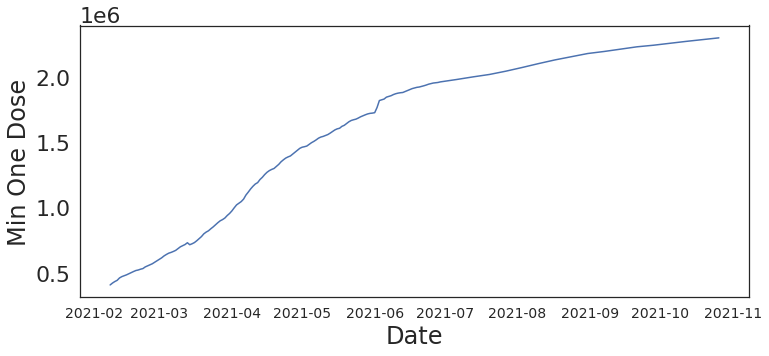

In [12]:
sns.lineplot(x="Date", y="Min One Dose", data=sd_covid_vaccines)
plt.xticks(fontsize=14)

As we can see there is a decently linear progression of vaccinated individuals over the course of our data's timeframe (02/08/21 - 10/26/21). Now let's graph the number of covid-19 related deaths over the course of the same timeframe.

(array([18659., 18687., 18718., 18748., 18779., 18809., 18840., 18871.,
        18901., 18932.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

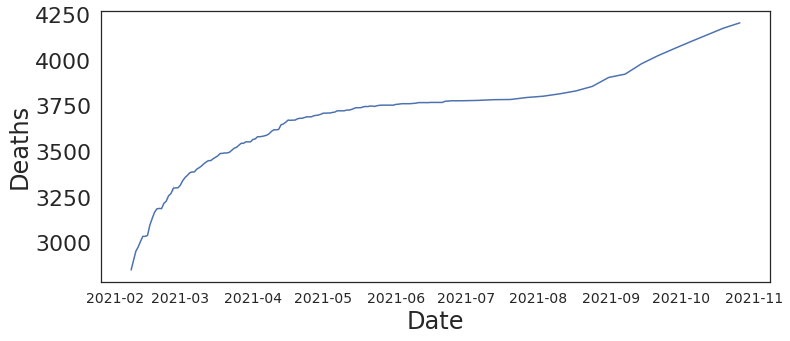

In [13]:
sns.lineplot(x="Date", y="Deaths", data=sd_covid_death)
plt.xticks(fontsize=14)

The death count also obviously increases significantly over the course of our timeframe but in a less linear manner. We can see that earlier in the pandemic the death count increases very fast. 

Toward the middle the death count seems to level out and then toward the end it increases again. We want to see whether or not these trends are affected by the amount of vaccinated individuals at all. 

It is possible that the declining death rate in the middle may have been due to increasing vaccine distribution, but this is all speculation until we do further analysis. 

Upon evaluating the data we have, it seems as though the entries we have are recorded per day from 02/08/21 - 06/29/21 and then the remaining entries are per week until 10/26/21. This inconsistency will be handled later.

Now let's use a scatterplot to visualize the relationship between the death count and the # of individuals vaccinated with at least one dose.

Text(0.5, 1.0, 'Relationship Between Death Count & Vaccinated Individuals')

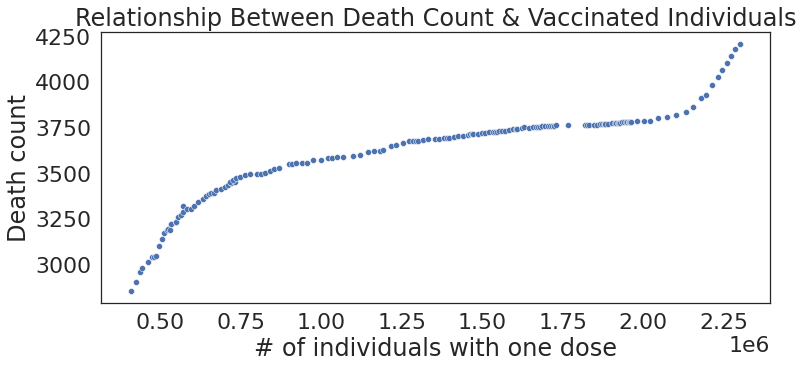

In [14]:
sns.scatterplot(x="Min One Dose", y="Deaths", data=sd_covid)
plt.xlabel("# of individuals with one dose")
plt.ylabel("Death count")
plt.title("Relationship Between Death Count & Vaccinated Individuals")

This graph looks almost identical to the graph of death count over time which makes sense considering the number of vaccinated individuals and the dates have an almost linear correlation referring to our first lineplot. Our new plot seems to be split into three main sections and we could fit lines on these three sections to compare the slope changes which are essentially the death rate.

(array([18687., 18718., 18748., 18779., 18809., 18840., 18871., 18901.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

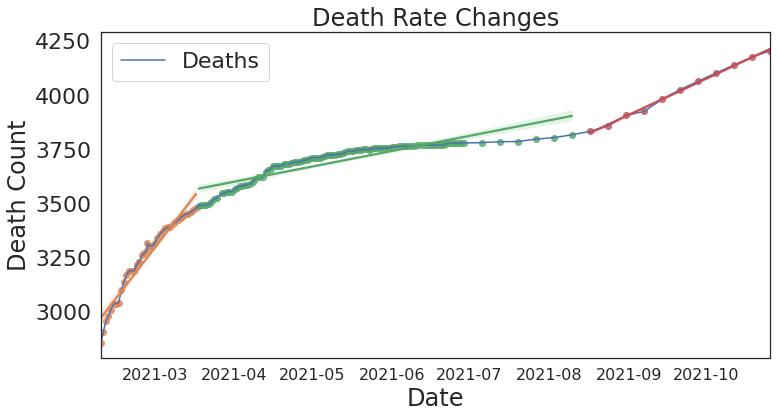

In [15]:
# Define our date cutoffs
d1 = datetime.date(2021, 3, 18)
d2 = datetime.date(2021, 8, 17)

# Must add a column that converts the date to a number because datetime.date objects not allowed 
# in regplot
sd_covid['Date As Num'] = sd_covid['Date'].apply(date2num)

fig, ax = plt.subplots(figsize=(12, 6))
sd_covid.plot.line('Date', 'Deaths', ax=ax)

p2 = sns.regplot(x='Date As Num',y='Deaths',data=sd_covid[sd_covid['Date']<d1])
sns.regplot(x='Date As Num',y='Deaths',data=sd_covid[(sd_covid['Date']>=d1) & (sd_covid['Date']<d2)])
sns.regplot(x='Date As Num',y='Deaths',data=sd_covid[sd_covid['Date']>=d2])
p2.set_title('Death Rate Changes')
p2.set_ylabel('Death Count')
p2.set_xlabel('Date')
plt.xticks(fontsize=16)

Now that we have lines fitted on our three segments let's take a look at their slopes and compare. First we have to split our data into the three segments.

In [16]:
#split data into the three sections above
lin1df = sd_covid[sd_covid['Date']<d1]
lin2df = sd_covid[(sd_covid['Date']>=d1) & (sd_covid['Date']<d2)]
lin3df = sd_covid[sd_covid['Date']>=d2]


Let's fit linear regression models on each segment and print their results.

In [17]:
#Fit model on first segment and print results
outcome1, predictors1 = patsy.dmatrices('Q("Deaths") ~ Q("Date As Num")', lin1df)
model1 = sm.OLS(outcome1, predictors1)
print(model1.fit().summary())

                            OLS Regression Results                            
Dep. Variable:            Q("Deaths")   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     657.1
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           5.12e-26
Time:                        00:13:57   Log-Likelihood:                -209.46
No. Observations:                  41   AIC:                             422.9
Df Residuals:                      39   BIC:                             426.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -2.866e+05   1.13e+04  

In [18]:
#Fit model on first segment and print results
outcome2, predictors2 = patsy.dmatrices('Q("Deaths") ~ Q("Date As Num")', lin2df)
model2 = sm.OLS(outcome2, predictors2)
print(model2.fit().summary())

                            OLS Regression Results                            
Dep. Variable:            Q("Deaths")   R-squared:                       0.819
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     485.2
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           1.49e-41
Time:                        00:13:57   Log-Likelihood:                -547.96
No. Observations:                 109   AIC:                             1100.
Df Residuals:                     107   BIC:                             1105.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -3.982e+04   1975.669  

In [19]:
#Fit model on first segment and print results
outcome3, predictors3 = patsy.dmatrices('Q("Deaths") ~ Q("Date As Num")', lin3df)
model3 = sm.OLS(outcome3, predictors3)
print(model3.fit().summary())

                            OLS Regression Results                            
Dep. Variable:            Q("Deaths")   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     2528.
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           2.44e-12
Time:                        00:13:57   Log-Likelihood:                -37.534
No. Observations:                  11   AIC:                             79.07
Df Residuals:                       9   BIC:                             79.86
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -1.01e+05   2087.840  

/opt/conda/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=11
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


The main things were looking for with these three regression reports are the coefficients of each which essentially give us the slope of each line. The slope of each line also represents the approximate death rate in that segments time frame.

The coefficients(slopes) are as follows:
- segment 1: 15.5154
- segment 2: 2.3198
- segment 3: 5.5571

This means that from (02/08/21 - 03/17/21) there were around 15 Covid-19 related deaths per day. From (03/18/21 - 08/16/21) there were around 2 Covid-19 related deaths per day. Lastly, from (08/17/21 - 10/26/21) there were around 5 Covid-19 related deaths per day. As we can see from segment 1 to segment 2 there is a significant decline in Covid-19 related death rate. Keep in mind that the # of individuals vaccinated with at least one dose increases linearly with time. Once the # of vaccinated individuals exceeded ~750,000 on 03/17/21, the Covid-19 related death rate plummeted. This implies that there may be a negative correlation between the # of vaccinated individuals and death rate.

Then from segment 2 to 3 we see a slight increase in death rate which makes sense considering this shift aligns with the emergence of the delta variant (source: https://www.sandiegocounty.gov/content/dam/sdc/hhsa/programs/phs/Epidemiology/COVID-19%20Variant%20Case%20Summary.pdf) 

While this information is enlightening we want to be able to visualize the potentially negative correlation mentioned above. In order to do this we need to manipulate our data to have some representation of death rate on the Y-axis rather than just the cumulative death count. We will do this by calculating the death count per week and seeing how the # of vaccinated individuals affects the # of deaths per week.

As of now the dataframe only has the cumulative count of the COVID-related deaths. With the dataframe as it is now, we will only see that the death count is increasing because it is not possible to decrease the amount of deaths, but we want to see whether or not the amount of individuals with at least one dose of a COVID vaccine decreases the death count per week. So we will create a function that groups the rows in the dataframe sd_covid by weeks in order to see how much the death count increases or decreases per week and store that in a new dataframe called sd_covid_weekly.

In [20]:
#make new column for week
def weekCol(x):
  return x.isocalendar()[1]

sd_covid['Week'] = sd_covid['Date'].apply(weekCol)

#Let's make a new dataframe so that our original data is not lost from the compression
sd_covid_weekly = sd_covid.groupby(['Week']).max()

#Get the deaths per week in a new column
sd_covid_weekly['Deaths Per Week'] = sd_covid_weekly["Deaths"].diff()
sd_covid_weekly.head() 

,Date,Positives,Hospitalized,Deaths,Min One Dose,Date As Num,Deaths Per Week
Week,,,,,,,
6,2021-02-14,252943,12144.0,3037.0,479678.0,18672.0,NaN
7,2021-02-21,257351,12968.0,3190.0,529689.0,18679.0,153.0
8,2021-02-28,3880233,13162.0,3317.0,593992.0,18686.0,127.0
9,2021-03-07,263275,13259.0,3390.0,665354.0,18693.0,73.0
10,2021-03-14,265649,13343.0,3452.0,732189.0,18700.0,62.0


Now let's graph the same thing as before but with the weekly death count rather than the cumulative death count.

Text(0.5, 1.0, 'Relationship Between Death Rate and # of Vaccinated Individuals')

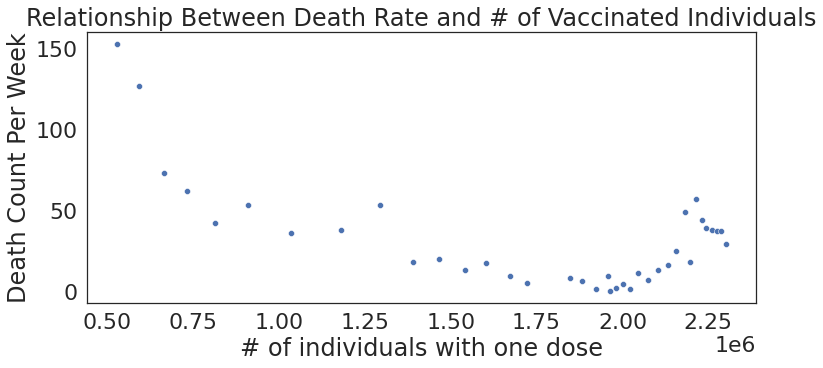

In [21]:
sns.scatterplot(x="Min One Dose", y="Deaths Per Week", data=sd_covid_weekly)
plt.xlabel("# of individuals with one dose")
plt.ylabel("Death Count Per Week")
plt.title("Relationship Between Death Rate and # of Vaccinated Individuals")

This graph coincides with our previous one because we can see that the weekly death count sharply decreases, levels out, and then slightly increases again toward the end. Next, we will fit a linear model for the two variables "Death Count Per Week" and "# of Individuals with One Dose". Through this scatter plot we can see only speculate that there is a relationship between the variables. However, through the model we will be able to determine whether or not there is actually a relationship between the two variables. Also, we will be able to see how much the amount of individuals with at least one dose of a COVID vaccine affects the death count or if it is simply noise that is causing the graph to look the way it does. When conducting the model we will be assuming the null hypothesis that there is no relationship between the two variables "Death Count Per Week" and "# of Individuals with One Dose".

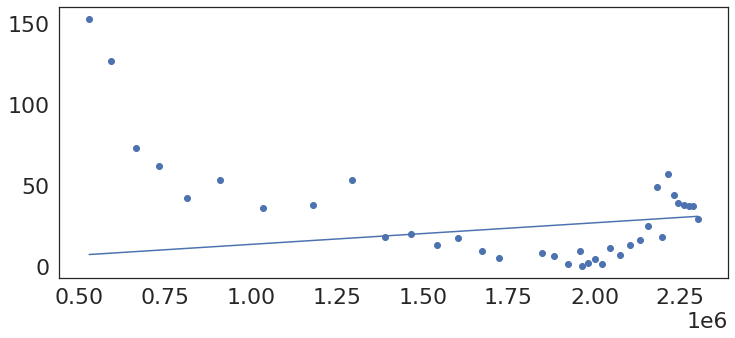

In [22]:
sd_covid_weekly = sd_covid_weekly.dropna()
X_lin = sd_covid_weekly[['Min One Dose']]
y_lin = sd_covid_weekly['Deaths Per Week']
model_lin = sm.OLS(y_lin, X_lin).fit()
ypred = model_lin.predict(X_lin) 

plt.scatter(X_lin,y_lin)
plt.plot(X_lin,ypred)

As we can see this line is a pretty poor fit for our data, let's check the regression report to see just how poor this model is.

In [23]:
model_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        Deaths Per Week   R-squared (uncentered):                   0.281
Model:                            OLS   Adj. R-squared (uncentered):              0.261
Method:                 Least Squares   F-statistic:                              14.09
Date:                Sun, 13 Mar 2022   Prob (F-statistic):                    0.000614
Time:                        00:13:58   Log-Likelihood:                         -187.50
No. Observations:                  37   AIC:                                      377.0
Df Residuals:                      36   BIC:                                      378.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Min One Dose  1.336e-05   3.56e-06      3.754      0.001    6.14e-06    2.06e-05
==============================================================================
Omnibus:                       28.286   Durbin-Watson:                   0.186
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.218
Skew:                           2.011   Prob(JB):                     2.78e-12
Kurtosis:                       7.283   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Through the model summary we can dismiss the null hypothesis due to the fact that the confidence interval is between 6.14e-06 and 2.06e-05. Since this interval is between two positive numbers 0 is not between these two numbers. With rejecting the null hypothesis we can conclude that there is a relationship between the death count per week and the amount of individuals with at least one dose of a COVID vaccine.

In addition, looking at the P>|t| value it is 0.001. Which means there is a 0.1% chance that the amount of individuals who have at least one dose of the vaccine does not have an effect on the death count per week. 0.1% is a very small percentage and through that we can also conclude that there is a relationship between the two variables.

However, using linear regression our R-squared value is 0.281 which is very low. This means that a linear regression fits our data very poorly and we need to adjust the type of regression we use. It seems as though our data may be polynomial, as the shape our scatter plot makes resembles more of a parabola than it does a line. Let's try doing some polynomial regression with a degree of 2 to hopefully get a better fit model.

In [24]:
X = sd_covid_weekly[['Min One Dose']]
y = sd_covid_weekly['Deaths Per Week']

pre_process = PolynomialFeatures(degree=2)
X_poly = pre_process.fit_transform(X)
X_poly


array([[1.00000000e+00, 5.29689000e+05, 2.80570437e+11],
       [1.00000000e+00, 5.93992000e+05, 3.52826496e+11],
       [1.00000000e+00, 6.65354000e+05, 4.42695945e+11],
       [1.00000000e+00, 7.32189000e+05, 5.36100732e+11],
       [1.00000000e+00, 8.13623000e+05, 6.61982386e+11],
       [1.00000000e+00, 9.09343000e+05, 8.26904692e+11],
       [1.00000000e+00, 1.03447800e+06, 1.07014473e+12],
       [1.00000000e+00, 1.18184400e+06, 1.39675524e+12],
       [1.00000000e+00, 1.29362200e+06, 1.67345788e+12],
       [1.00000000e+00, 1.38943200e+06, 1.93052128e+12],
       [1.00000000e+00, 1.46762400e+06, 2.15392021e+12],
       [1.00000000e+00, 1.54152300e+06, 2.37629316e+12],
       [1.00000000e+00, 1.60431700e+06, 2.57383304e+12],
       [1.00000000e+00, 1.67409800e+06, 2.80260411e+12],
       [1.00000000e+00, 1.72286000e+06, 2.96824658e+12],
       [1.00000000e+00, 1.84695300e+06, 3.41123538e+12],
       [1.00000000e+00, 1.88268800e+06, 3.54451411e+12],
       [1.00000000e+00, 1.92449

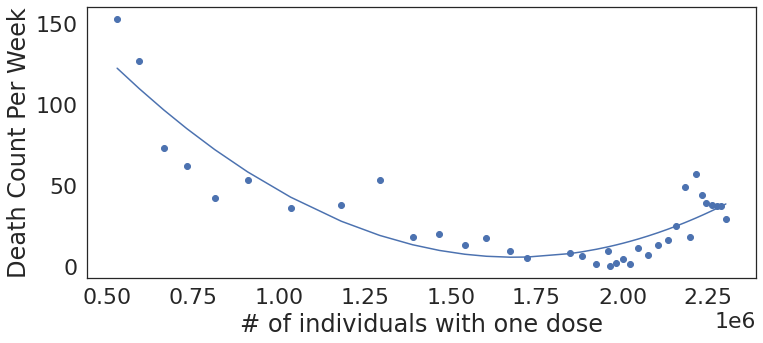

In [25]:
model = sm.OLS(y, X_poly).fit()

y_pred = model.predict(X_poly)

plt.scatter(X, y)
plt.xlabel("# of individuals with one dose")
plt.ylabel("Death Count Per Week")
plt.plot(X, y_pred)

In [26]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Deaths Per Week   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.798
Method:                 Least Squares   F-statistic:                     72.06
Date:                Sun, 13 Mar 2022   Prob (F-statistic):           5.93e-13
Time:                        00:13:58   Log-Likelihood:                -150.63
No. Observations:                  37   AIC:                             307.3
Df Residuals:                      34   BIC:                             312.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        254.1334     19.957     12.734      0.000     213.575     294.692
x1            -0.0003   2.99e-05     -9.865      0.000      -0.000      -0.000
x2          8.742e-11      1e-11      8.737      0.000    6.71e-11    1.08e-10
==============================================================================
Omnibus:                        1.891   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.388   Jarque-Bera (JB):                1.178
Skew:                           0.431   Prob(JB):                        0.555
Kurtosis:                       3.150   Cond. No.                     2.98e+13
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.98e+13. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After doing polynomial regression we can see just through the graph that the line better fits our model. Also through the confidence intervals of the const, x1, and x2 we can still reject the null hypothesis. For all three of the confidence intervals each one, does not include 0. In addition, the adjusted R squared value achieved with the polynomial regression is much higher than the value we got with linear regression; more than doubling the value we got previously. 

The adjusted R squared value is the percentage of the outcome variable variation that is explained by a linear model. Using polynomial regression we can see that 79.8% of the variation in death count per week is explained by the amount of individuals who have at least one dose of a COVID vaccine. With an adjusted R squared value of 79.8% this shows that there is a strong correlation between the COVID-19 death count per week and the amount of individuals who have at least one dose of a COVID-19 vaccine.

Since we have proven there is a strong correlation between the two variables by looking at the scatter plot we can see that there is initially a negative correlation between COVID-19 death count per week and the amount of individuals who have at least one dose of the COVID-19 vaccine. However, the correlation between the two is not strictly negative as there is a spike in COVID-19 death rates towards the end of the graph.

# Ethics & Privacy

The dataset we derived our information from is an official and public source. The San Diego County preserved the confidentiality of individuals who were tested, hospitalized, or vaccinated for COVID-19. The information was collected from individuals but displayed through groups and cannot be traced back as no identifiers are present. The data grouped individuals by age range, gender, and coordinates of specific areas within San Diego County. As there was a small amount of identifying information, privacy concerns were not an issue in our project.

Anonymity is not enough to reduce information that some may consider a sensitive topic. Deaths being seen as a statistic could be triggering to those who have lost loved ones due to COVID-19. We acknowledge there is sensitivity to see someone’s life reduced to a number. There are also controversies within the United States concerning the efficacy of vaccines which can lead to sensitivity with some groups. We made a strong effort to not push our own biases but relied on the data to provide evidence. 

There could be potential biases from the datasets used as it only accounts for those who got tested and vaccinated for COVID-19. There is a strong chance there are positive cases within individuals that do not wish to get tested or have tested with an Antigen at-home test and have not reported the positive case to the county. With the sensitivity of the PCR test picking up the smallest trace of the virus, it is also possible that those who test positive once get retested with another PCR test before the suggested 3 months leading to a false positive case as they are no longer infectious.

# Conclusion & Discussion

Our complete analysis suggests that prior to the emergence of the Delta variant, there was a strong and negative correlation between the # of vaccinated individuals and the Covid-19 related death rate in San Diego from (02/08/21 - 10/26/21). We were hoping to see this negative correlation throughout our timeframe, but our results were more complicated than expected. While there were other variables such as variants that interfered with the support of our hypothesis, we can still see a net decrease in death rate from the beginning of our timeframe to the end regardless of the Delta variant. Despite the spike from the variant the death rate did not return to it's original severity toward the beginning of the pandemic, which also indicates that the high number of vaccinated individuals helped reduce the death rate even in the presence of the stronger and more easily transmissible Delta variant.

### Limitations
The most glaring and obvious limitation to the support of our hypothesis and overall analysis was the presence of variants. Viruses can be very unpredictable and fight hard to stay alive and spread to new hosts. It would definitely have been beneficial to have been able to find more data regarding the various variants, especially Delta, and include them in our analysis. Other limitations include things such as age and pre-existing medical conditions. It is a well-known fact that Covid-19 was especially life-threatening for the elderly and immuno-compromised populations. These factors definitely had a contribution to the death rate as well but we simply could not find relevant data on pre-existing medical conditions that aligned with our main datasets. We hope that the city of San Diego and other cities continue to collect more data on these topics as they may be extremely useful for future analyses.


### Discussion
It is clear that the Covid-19 virus had a severe impact in San Diego and many lives were lost. Although we were not able to prove with 100% certainty that more vaccinations always lead to less deaths, we were still able to prove that they definitely help reduce the death rate for Covid-19 even with the emergence of new variants. It is unfortunate that misinformation continues to spread equally as fast as Covid, but we hope that more experts continue to do work such as this to eventually persuade everyone that vaccines do in fact work.

# Team Contributions

- Jessica: Coding, Data Finding & Cleaning, EDA, annotations
- Jaime: Coding, Slide Preparation, Data Finding & Cleaning, EDA
- Bethany: Coding, Data Finding & Cleaning, EDA
- Jason: Background Research, Timeline, Ethics & Privacy, Quality Assurance
- Mark: Coding, Data Finding & Cleaning, EDA, Project Management